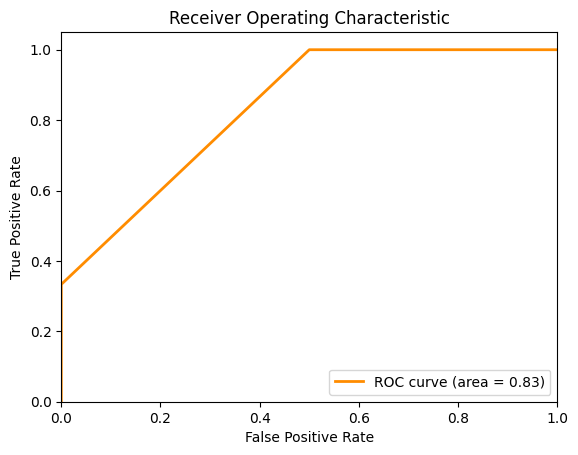

AUC-ROC: 0.8333333333333333
1.0
1.0


In [6]:
def make_clusters(data, n_clusters, num_inits=10): 
    inertias = [] 
    labels = [] 
 
    for i in range(num_inits): 
        kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1) 
        kmeans.fit(data) 
        inertias.append(kmeans.inertia_) 
        labels.append(kmeans.labels_) 
 
    x = np.linspace(0, num_inits - 1, num_inits) 
    plt.plot(x, inertias) 
    plt.xlabel('number of init') 
    plt.title('Inertia (sum of squared distances of samples to their closest cluster center)') 
    plt.show() 
 
    return inertias, labels 

from sklearn.cluster import KMeans 
import numpy as np 
 
# Количество кластеров 
k_values = [5, 9] 
bests_kmeans = [] 
# Проведем итерации для каждого значения K 
for k in k_values: 
    best_inertia = np.inf 
    best_kmeans = None 
    inertias = []
    # Проведем порядка 10 случайных инициализаций 
    for _ in range(10): 
        kmeans = KMeans(n_clusters=k, init='random', n_init=1)  # Используем случайную инициализацию 
        kmeans.fit(df[selected_features]) 
        inertias.append(kmeans.inertia_)
        # Сохраняем модель с минимальным значением inertia (критерий метода) 
        if kmeans.inertia_ < best_inertia: 
            best_inertia = kmeans.inertia_ 
            best_kmeans = kmeans 
 
    bests_kmeans.append(best_kmeans) 
    x = np.linspace(0, 10 - 1, 10) 
    plt.plot(x, inertias) 
    plt.xlabel('number of init') 
    plt.title('Inertia (sum of squared distances of samples to their closest cluster center)') 
    plt.show() 
    
    # Выведем результаты 
    print(f"Лучшая модель для K={k}:") 
    print(f"Inertia (критерий метода): {best_inertia}")
    best_model_k5 = bests_kmeans[0]
    best_model_k9 = bests_kmeans[1]

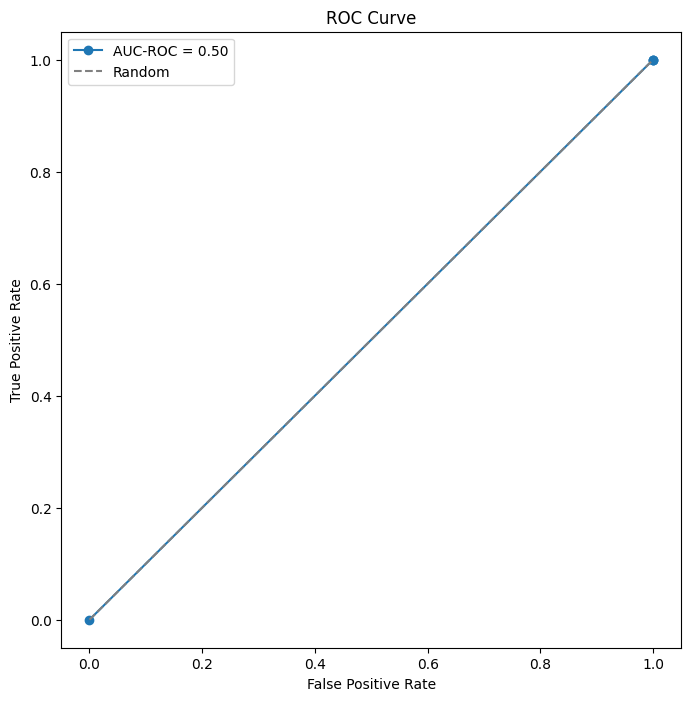

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve

# Ваши вероятности b(x)
probas = [0.1, 0.1, 0.4, 0.4, 0.8, 0.8, 0.95]

# Ваши истинные метки классов
true_labels = [0, 0, 0, 1, 0, 1, 1]

# Создаем списки для значений FPR и TPR
fpr, tpr, thresholds = roc_curve(true_labels, probas)

# Используем numpy для уникальных значений порогов
unique_thresholds = np.unique(thresholds)

# Интерполируем значения TPR и FPR для каждого уникального порога
interp_tpr = np.interp(unique_thresholds, thresholds, tpr)
interp_fpr = np.interp(unique_thresholds, thresholds, fpr)

# Вычисление AUC-ROC с учетом вертикальных отрезков
roc_auc = auc(interp_fpr, interp_tpr)

# Строим ROC-кривую с вертикальными отрезками
plt.figure(figsize=(8, 8))
plt.plot(interp_fpr, interp_tpr, marker='o', label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
